In [1]:
import pandas as pd
import datetime
import os

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
sns.set(color_codes=True)

# if matplotlib is not set inline, you will not see plots
%matplotlib inline 

In [47]:
columns = ["Timestamp", "Window", "Buyer", "Seller", "Weight"]

In [48]:
targetdir = "./data/EdgeWeight/seven_day_window/"
filelist = os.listdir(targetdir) 
columns = ["timestamp", "window", "buyer", "seller", "weight"]

df = pd.concat((pd.read_csv(targetdir + file, names= columns) 
                for file in filelist), ignore_index=True)

In [5]:
df[:10]

,timestamp,window,buyer,seller,weight
0,1511478000000,604800000,0x9c2ce25922dc592ffdf7f2c6b0a8678b21682116,0xba52c75764d6f594735dc735be7f1830cdf58ddf,4
1,1511478000000,604800000,0x78cff6a05343b7ab7d5dd453d39fa90427889e4e,0x6e129c4bef43eb234a10b969f15bc564511bec6c,1
2,1511478000000,604800000,0x78cff6a05343b7ab7d5dd453d39fa90427889e4e,0x51c3016d6699480ec6becdf2155079c27ebae040,1
3,1511478000000,604800000,0xb89465f04caf9334d3d116637ac2a9c4aa8dcff6,0xba52c75764d6f594735dc735be7f1830cdf58ddf,1
4,1511478000000,604800000,0xb89465f04caf9334d3d116637ac2a9c4aa8dcff6,0xcca5859e65518124a7d0452d4338a61953629448,1
5,1511478000000,604800000,0xb89465f04caf9334d3d116637ac2a9c4aa8dcff6,0x0b8546f4d2f324aba30168dc8acf113c301d3cfe,1
6,1511478000000,604800000,0xd5bfcb58f900b31c8155057616482a9d4ad70170,0xba52c75764d6f594735dc735be7f1830cdf58ddf,2
7,1511478000000,604800000,0xd5bfcb58f900b31c8155057616482a9d4ad70170,0x0b2bdfcfa98567b7fc1d86a64a4a19bd91a6b9d9,1
8,1511478000000,604800000,0xeb53365cf3fdab44aa568c2736697e41b15e300e,0xcca5859e65518124a7d0452d4338a61953629448,1
9,1511478000000,604800000,0xeb53365cf3fdab44aa568c2736697e41b15e300e,0xba52c75764d6f594735dc735be7f1830cdf58ddf,5


In [6]:
df.drop(["window", "buyer", "seller"], axis=1, inplace=True)

In [7]:
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='ms').dt.normalize()
df = df.reset_index()
df.drop(["index"],  axis=1, inplace=True)

In [8]:
len(df["timestamp"].unique())

1252

In [9]:
df

,timestamp,weight
0,2017-11-23,4
1,2017-11-23,1
2,2017-11-23,1
3,2017-11-23,1
4,2017-11-23,1
...,...,...
21418799,2021-04-27,1
21418800,2021-04-27,2
21418801,2021-04-27,1
21418802,2021-04-27,1


In [10]:
df.sort_values(["timestamp"])

,timestamp,weight
0,2017-11-23,4
16125293,2017-11-23,7
16125292,2017-11-23,2
16125291,2017-11-23,16
16125290,2017-11-23,1
...,...,...
7986610,2021-04-27,1
7986611,2021-04-27,1
7986612,2021-04-27,38
7986592,2021-04-27,1


In [22]:
df[df["timestamp"] == "2021-02-27"].sort_values(["weight"])[65:75]

,timestamp,weight
12135979,2021-02-27,1
20199712,2021-02-27,1
20199711,2021-02-27,1
12136017,2021-02-27,1
20199702,2021-02-27,1
12136019,2021-02-27,1
12136020,2021-02-27,1
12136021,2021-02-27,1
12136022,2021-02-27,1
12136023,2021-02-27,1


In [42]:
df[df["timestamp"] == "2017-11-23"]

,timestamp,weight
0,2017-11-23,4
1,2017-11-23,1
2,2017-11-23,1
3,2017-11-23,1
4,2017-11-23,1
...,...,...
18802109,2017-11-23,2
18802110,2017-11-23,1
18802111,2017-11-23,2
18802112,2017-11-23,1


# Seven-day window

## Mean weight per day

In [23]:
df_mean = df.groupby(["timestamp"]).mean()
df_mean = df_mean.reset_index()
df_mean

,timestamp,weight
0,2017-11-23,3.428571
1,2017-11-24,1.784274
2,2017-11-25,1.555556
3,2017-11-26,1.517052
4,2017-11-27,1.471662
...,...,...
1247,2021-04-23,1.454679
1248,2021-04-24,1.467354
1249,2021-04-25,1.472531
1250,2021-04-26,1.481255


In [24]:
df_mean.sort_values(["weight"], ascending=False)

,timestamp,weight
735,2019-11-28,14.087860
736,2019-11-29,13.651002
734,2019-11-27,13.099359
737,2019-11-30,12.953891
733,2019-11-26,12.113490
...,...,...
19,2017-12-12,1.039141
18,2017-12-11,1.036656
15,2017-12-08,1.036246
17,2017-12-10,1.035129


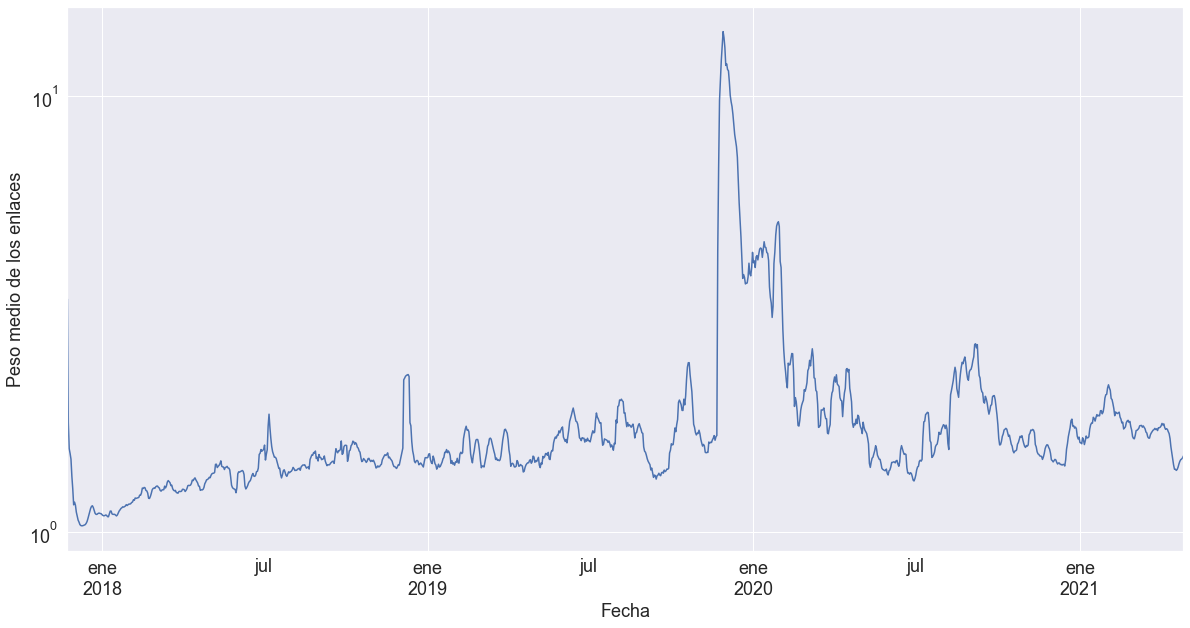

In [29]:
import locale
locale.setlocale(locale.LC_ALL, 'es_ES')

ax = df_mean.plot(kind = 'line', x = 'timestamp', y = 'weight')
ax.set_yscale('log')
ax.set_xlabel("Fecha", fontsize=18)
ax.set_ylabel("Peso medio de los enlaces", fontsize=18)
ax.get_legend().remove()
#plt.legend(["Todos los activos"])
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 
plt.rcParams["figure.figsize"] = (20,10)

plt.savefig("./weightCDF/seven_day_window/seven_day_window_mean_weightCDF.svg", bbox_inches='tight')

## Median weight per day

In [31]:
df_median = df.groupby(["timestamp"]).median()
df_median = df_median.reset_index()
df_median

,timestamp,weight
0,2017-11-23,1.0
1,2017-11-24,1.0
2,2017-11-25,1.0
3,2017-11-26,1.0
4,2017-11-27,1.0
...,...,...
1247,2021-04-23,1.0
1248,2021-04-24,1.0
1249,2021-04-25,1.0
1250,2021-04-26,1.0


In [32]:
df_median["weight"].unique()

array([1.])

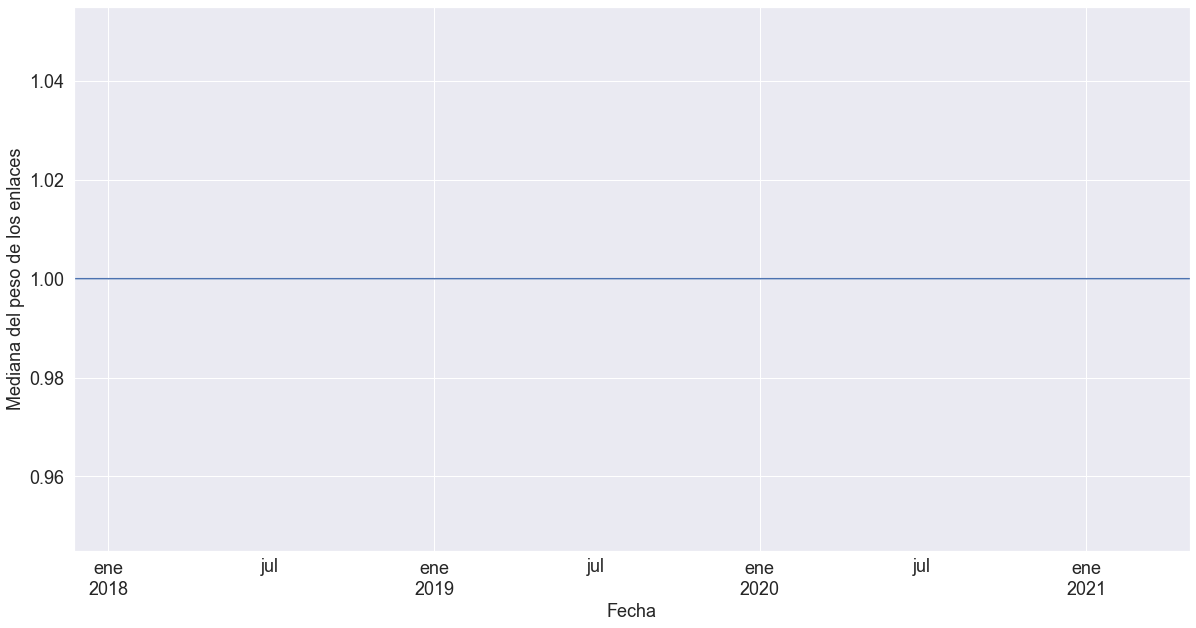

In [33]:
ax = df_median.plot(kind = 'line', x = 'timestamp', y = 'weight')

#ax.set_yscale('log')
ax.set_xlabel("Fecha", fontsize=18)
ax.set_ylabel("Mediana del peso de los enlaces", fontsize=18)
ax.get_legend().remove()
#plt.legend(["Todos los activos"])

plt.savefig("./weightCDF/seven_day_window/seven_day_window_median_weightCDF.svg", bbox_inches='tight')

## Max weight per day

In [34]:
df_max = df.groupby(["timestamp"]).max()
df_max = df_max.reset_index()
df_max

,timestamp,weight
0,2017-11-23,113
1,2017-11-24,113
2,2017-11-25,113
3,2017-11-26,113
4,2017-11-27,113
...,...,...
1247,2021-04-23,514
1248,2021-04-24,648
1249,2021-04-25,1140
1250,2021-04-26,1216


In [35]:
df_max.sort_values(["weight"], ascending=False)

,timestamp,weight
740,2019-12-03,9562
739,2019-12-02,9458
741,2019-12-04,8374
738,2019-12-01,8022
742,2019-12-05,7518
...,...,...
920,2020-05-31,19
922,2020-06-02,19
921,2020-06-01,18
34,2017-12-27,16


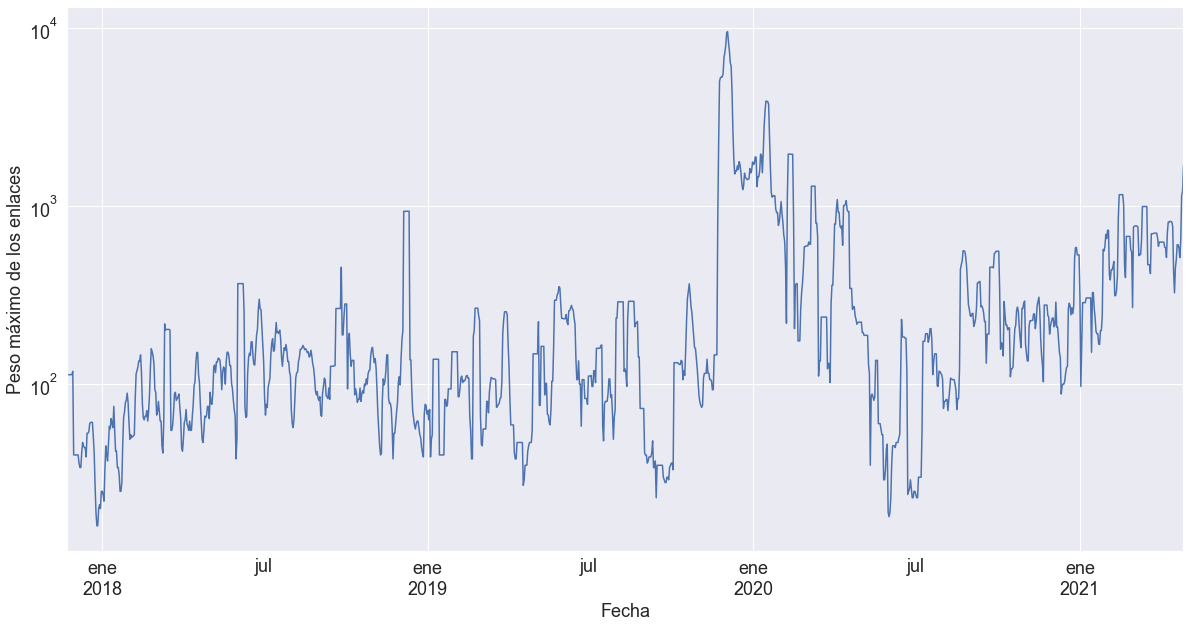

In [36]:
ax = df_max.plot(kind = 'line', x = 'timestamp', y = 'weight')

ax.set_yscale('log')
ax.set_xlabel("Fecha", fontsize=18)
ax.set_ylabel("Peso máximo de los enlaces", fontsize=18)
ax.get_legend().remove()

plt.savefig("./weightCDF/seven_day_window/seven_day_window_max_weightCDF.svg", bbox_inches='tight')

# Thirty-day window

In [37]:
targetdir = "./data/EdgeWeight/thirty_day_window/"
filelist = os.listdir(targetdir) 
columns = ["timestamp", "window", "buyer", "seller", "weight"]

df = pd.concat((pd.read_csv(targetdir + file, names= columns) 
                for file in filelist), ignore_index=True)

df.drop(["window", "buyer", "seller"], axis=1, inplace=True)

df["timestamp"] = pd.to_datetime(df["timestamp"], unit='ms').dt.normalize()
df = df.reset_index()
df.drop(["index"],  axis=1, inplace=True)

df

,timestamp,weight
0,2017-11-23,4
1,2017-11-23,1
2,2017-11-23,1
3,2017-11-23,1
4,2017-11-23,1
...,...,...
67691359,2021-04-27,1
67691360,2021-04-27,1
67691361,2021-04-27,1
67691362,2021-04-27,1


## Mean weight per day

In [38]:
df_mean = df.groupby(["timestamp"]).mean()
df_mean = df_mean.reset_index()
df_mean

,timestamp,weight
0,2017-11-23,3.428571
1,2017-11-24,1.784274
2,2017-11-25,1.555556
3,2017-11-26,1.517052
4,2017-11-27,1.471662
...,...,...
1247,2021-04-23,1.563735
1248,2021-04-24,1.561535
1249,2021-04-25,1.559480
1250,2021-04-26,1.551534


In [39]:
df_mean.sort_values(["weight"], ascending=False)

,timestamp,weight
758,2019-12-21,11.209929
755,2019-12-18,11.175215
756,2019-12-19,11.156596
757,2019-12-20,11.156131
754,2019-12-17,11.148511
...,...,...
16,2017-12-09,1.051201
20,2017-12-13,1.050473
19,2017-12-12,1.050205
18,2017-12-11,1.049979


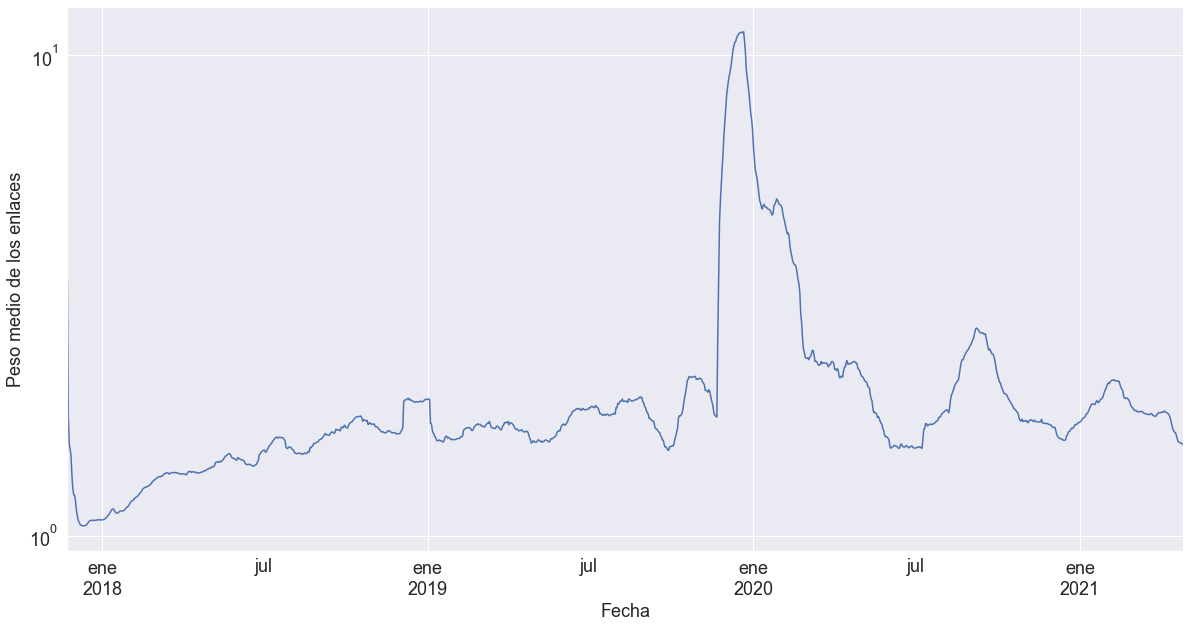

In [40]:
import locale
locale.setlocale(locale.LC_ALL, 'es_ES')

ax = df_mean.plot(kind = 'line', x = 'timestamp', y = 'weight')
ax.set_yscale('log')
ax.set_xlabel("Fecha", fontsize=18)
ax.set_ylabel("Peso medio de los enlaces", fontsize=18)
ax.get_legend().remove()
#plt.legend(["Todos los activos"])

plt.savefig("./weightCDF/thirty_day_window/thirty_day_window_mean_weightCDF.svg", bbox_inches='tight')

## Median weight per day

In [41]:
df_median = df.groupby(["timestamp"]).median()
df_median = df_median.reset_index()
df_median

,timestamp,weight
0,2017-11-23,1.0
1,2017-11-24,1.0
2,2017-11-25,1.0
3,2017-11-26,1.0
4,2017-11-27,1.0
...,...,...
1247,2021-04-23,1.0
1248,2021-04-24,1.0
1249,2021-04-25,1.0
1250,2021-04-26,1.0


In [42]:
df_median["weight"].unique()

array([1.])

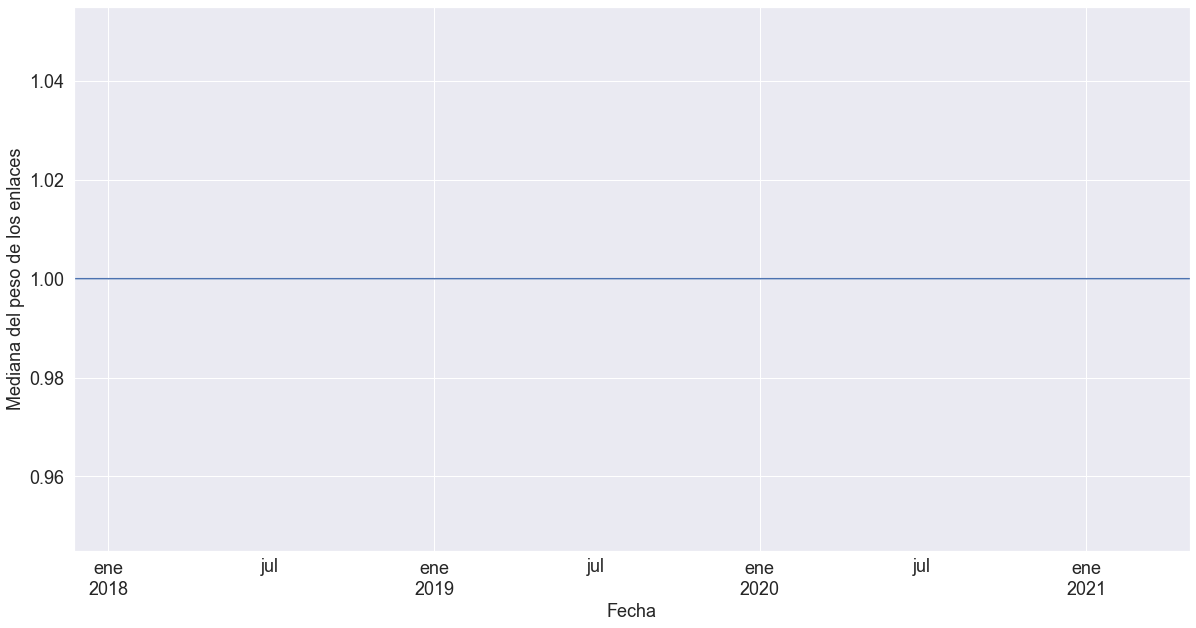

In [43]:
ax = df_median.plot(kind = 'line', x = 'timestamp', y = 'weight')

#ax.set_yscale('log')
ax.set_xlabel("Fecha", fontsize=18)
ax.set_ylabel("Mediana del peso de los enlaces", fontsize=18)
ax.get_legend().remove()
#plt.legend(["Todos los activos"])

plt.savefig("./weightCDF/thirty_day_window/thirty_day_window_median_weightCDF.svg", bbox_inches='tight')

## Max weight per day

In [44]:
df_max = df.groupby(["timestamp"]).max()
df_max = df_max.reset_index()
df_max

,timestamp,weight
0,2017-11-23,113
1,2017-11-24,113
2,2017-11-25,113
3,2017-11-26,113
4,2017-11-27,113
...,...,...
1247,2021-04-23,809
1248,2021-04-24,809
1249,2021-04-25,1140
1250,2021-04-26,1216


In [45]:
df_max.sort_values(["weight"], ascending=False)

,timestamp,weight
760,2019-12-23,14779
759,2019-12-22,14752
758,2019-12-21,14431
757,2019-12-20,14319
753,2019-12-16,14300
...,...,...
32,2017-12-25,61
37,2017-12-30,61
31,2017-12-24,61
30,2017-12-23,61


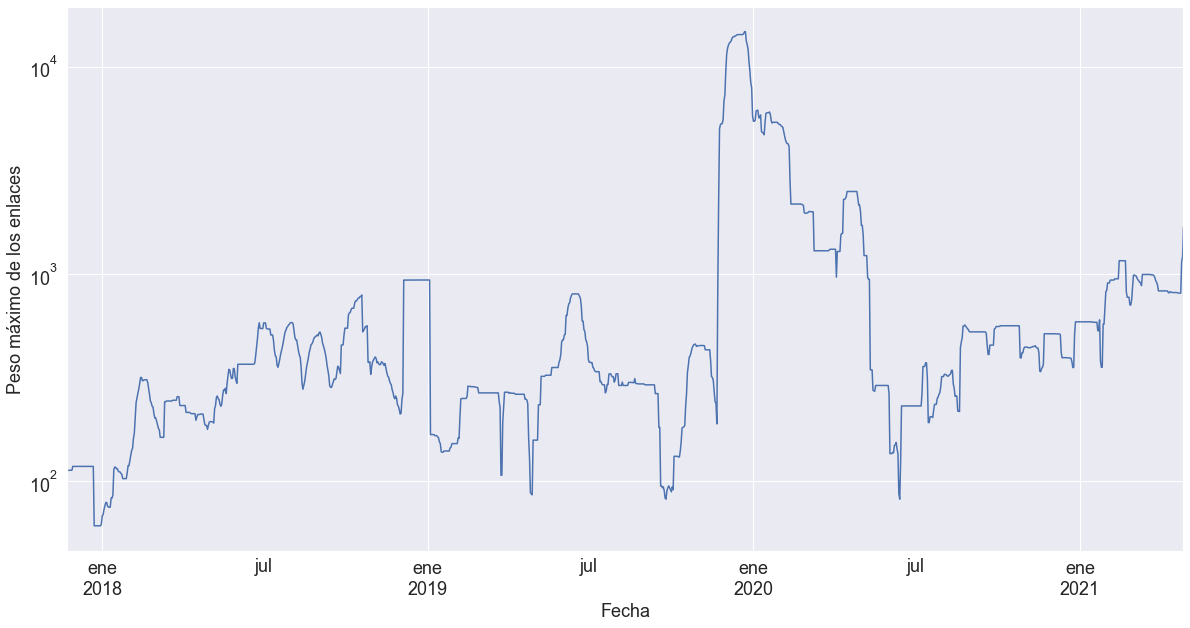

In [46]:
ax = df_max.plot(kind = 'line', x = 'timestamp', y = 'weight')

ax.set_yscale('log')
ax.set_xlabel("Fecha", fontsize=18)
ax.set_ylabel("Peso máximo de los enlaces", fontsize=18)
ax.get_legend().remove()

plt.savefig("./weightCDF/thirty_day_window/thirty_day_window_max_weightCDF.svg", bbox_inches='tight')